In [16]:
# Imports

import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Define data dir

# CONSTANTS
dir = os.path.abspath("Data/Line Data/")
print("Reading from " + dir)

Reading from /Users/jonathanhasenburg/git/jupyter-examples/Data/Line Data


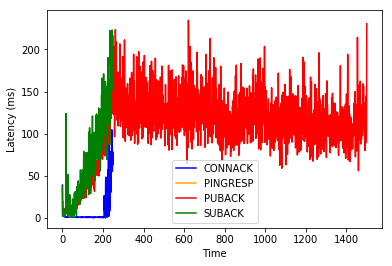

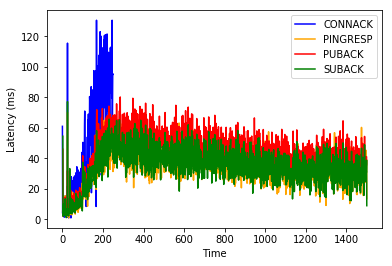

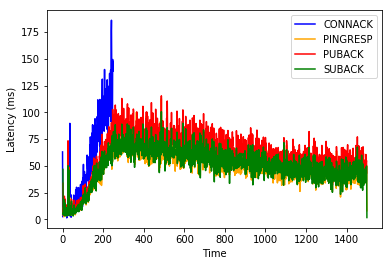

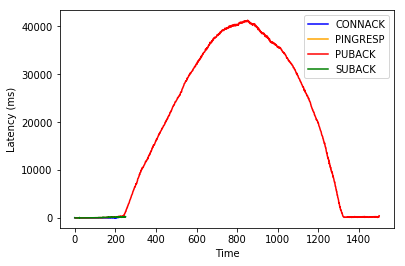

In [18]:
# Create linechart for every experiment

i = 1
for filename in glob.iglob(dir + "/**/experiment_5*/*.csv", recursive=True):
    list = filename.split('.')
    output = list[0] + ".pdf"
    
    df = pd.read_csv(filename, delimiter=";", decimal=",")

    min = df["timebucket"][0]

    df["timebucket"] = (df["timebucket"] - min) / 1000
    
    fig = plt.figure(i)
    ax = plt.gca()

    df.plot(kind='line',x='timebucket',y='CONNACK', color="blue",ax=ax)
    df.plot(kind='line',x='timebucket',y='PINGRESP', color='orange', ax=ax)
    df.plot(kind='line',x='timebucket',y='PUBACK', color='red', ax=ax)
    df.plot(kind='line',x='timebucket',y='SUBACK', color='green', ax=ax)
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Latency (ms)")

    fig.savefig(output)
    i = i + 1
    # plt.close() # should be enabled, when to many files

Y does not exist
Y does not exist


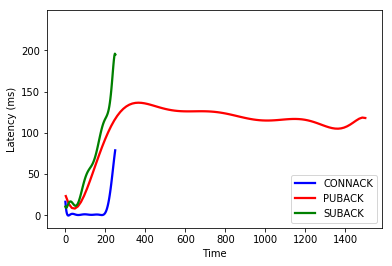

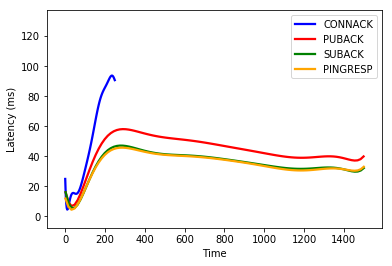

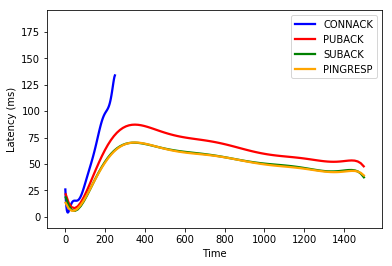

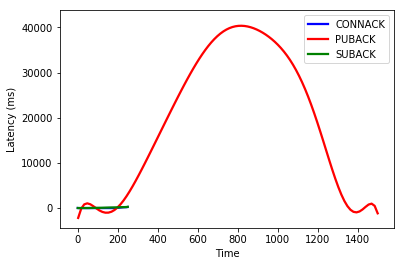

In [19]:
# Trend of Line Chart

i = 1
for filename in glob.iglob(dir + "/**/experiment_5*/*.csv", recursive=True):
    list = filename.split('.')
    output = list[0] + "-trend.pdf"    
    df = pd.read_csv(filename, delimiter=";", decimal=",")

    min = df["timebucket"][0]

    df["timebucket"] = (df["timebucket"] - min) / 1000
    
    fig = plt.figure(i)
    ax = plt.gca()

    sns.regplot(x='timebucket', y="CONNACK", data=df, ax=ax, order=10, ci=None, truncate=True, 
                line_kws={'color':'blue'},
                scatter_kws={'color':'None'}, label=".")
    sns.regplot(x='timebucket', y="PUBACK", data=df, ax=ax, order=10, ci=None, truncate=True, 
            line_kws={'color':'red'},
            scatter_kws={'color':'None'})
    sns.regplot(x='timebucket', y="SUBACK", data=df, ax=ax, order=10, ci=None, truncate=True, 
            line_kws={'color':'green'},
            scatter_kws={'color':'None'})
    try:
        sns.regplot(x='timebucket', y="PINGRESP", data=df, ax=ax, order=10, ci=None, truncate=True, 
                line_kws={'color':'orange'},
                scatter_kws={'color':'None'})
        noPing = False
    except TypeError:
        print("Y does not exist")
        noPing = True
      
    # Set characteristics of chart
    ax.legend(loc="best")
    ax.set_xlabel("Time")
    ax.set_ylabel("Latency (ms)")
    if not noPing:
        labels = ["CONNACK", "PUBACK", "SUBACK", "PINGRESP"]
    else:
        labels = ["CONNACK", "PUBACK", "SUBACK"]
    ax.legend(labels)
    
    fig.savefig(output)
    i = i + 1
    
    # plt.close() # should be enabled, when to many files